In [1]:
import numpy as np
import matplotlib.pyplot as plt
from reg_utils import sigmoid, relu, plot_decision_boundary, initialize_parameters,load_2D_dataset,predict_dec
from reg_utils import compute_cost, predict, forward_propagation, backward_propagation, update_parameters
import sklearn
import sklearn.datasets
import scipy.io
from testCases import *
plt.rcParams['figure.figsize'] = (7.0, 4.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

reg_utils.py:85: SyntaxWarning: assertion is always true, perhaps remove parentheses?
  assert(parameters['W' + str(l)].shape == layer_dims[l], layer_dims[l-1])
reg_utils.py:86: SyntaxWarning: assertion is always true, perhaps remove parentheses?
  assert(parameters['W' + str(l)].shape == layer_dims[l], 1)


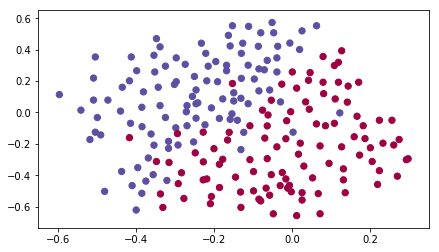

In [2]:
train_X,train_Y,test_X,test_Y = load_2D_dataset()

In [3]:
def model(X,Y,learning_rate=0.3,num_iterations = 30000,print_cost =True,lambd =0,keep_prob =1):
    grads = {}
    costs = []
    m = X.shape[1]
    layers_dims = [X.shape[0],20,3,1]
    
    parameters = initialize_parameters(layers_dims)
    
    for i in range(0,num_iterations):
        if keep_prob == 1 :
            a3,cache = forward_propagation(X,parameters)
        elif keep_prob <1:
            a3,cache = forward_propagation_with_dropout(X,parameters,keep_prob)
        
        if lambd == 0:
            cost = compute_cost(a3,Y)
        else:
            cost = compute_cost_with_regularization(a3,Y,parameters,lambd)
         
        if lambd ==0 and keep_prob==1:
            grads = backward_propagation(X,Y,cache)
        elif lambd != 0:
            grads = backward_propagation_with_regularization(X,Y,cache,lambd)
        elif keep_prob<1:
            grads = backward_propagation_with_dropout(X,Y,cache,keep_prob)
        
        parameters = update_parameters(parameters,grads,learning_rate)
        
        if print_cost and i%10000==0:
            print "Cost after iteration {}:{}".format(i,cost)
        if print_cost and i%1000==0:
            costs.append(cost)
    
    plt.plot(costs)
    plt.ylabel('cost')
    plt.xlabel('iteration(x1,1000)')
    plt.title("learning rate ="+str(learning_rate))
    plt.show()
    
    return parameters

Cost after iteration 0:0.655741252348
Cost after iteration 10000:0.163299875257
Cost after iteration 20000:0.138516424233


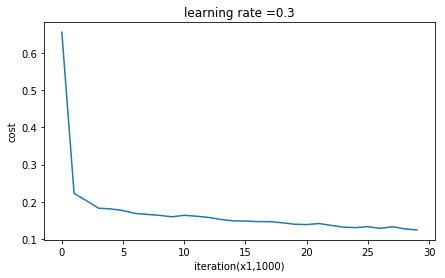

On the training set:
Accuracy: 0.947867298578
On the test set:
Accuracy: 0.915


In [4]:
parameters = model(train_X, train_Y)
print ("On the training set:")
predictions_train = predict(train_X, train_Y, parameters)
print ("On the test set:")
predictions_test = predict(test_X, test_Y, parameters)

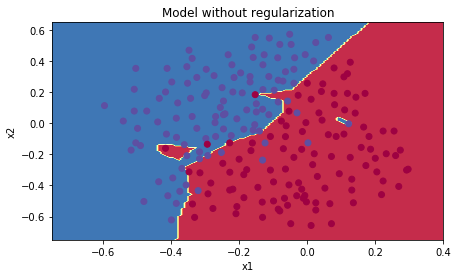

In [5]:
plt.title("Model without regularization")
axes = plt.gca()
axes.set_xlim([-0.75,0.40])
axes.set_ylim([-0.75,0.65])
plot_decision_boundary(lambda x: predict_dec(parameters, x.T), train_X, train_Y)

In [10]:
def compute_cost_with_regularization(A3,Y,parameters,lambd):
    m = Y.shape[1]
    W1 = parameters["W1"]
    W2 = parameters["W2"]
    W3 = parameters["W3"]
    
    cross_entropy_cost = compute_cost(A3,Y)
    
    L2_regularization_cost = (np.sum(np.square(W1))+np.sum(np.square(W2))+np.sum(np.square(W3)))*1/m*lambd/2
    
    cost = cross_entropy_cost+L2_regularization_cost
    
    return cost

In [11]:
A3, Y_assess, parameters = compute_cost_with_regularization_test_case()

print "cost = " + str(compute_cost_with_regularization(A3, Y_assess, parameters, lambd = 0.1))

cost = 1.78648594516


In [28]:
def backward_propagation_with_regularization(X,Y,cache,lambd):
    m = X.shape[1]
    (Z1, A1, W1, b1, Z2, A2, W2, b2, Z3, A3, W3, b3) = cache
    
    dZ3 = A3-Y
    
    dW3 = 1./m*np.dot(dZ3,A2.T)+lambd/m*W3
    db3 = 1./m*np.sum(dZ3,axis=1,keepdims=True)
    
    dA2 = np.dot(W3.T,dZ3)
    dZ2 = np.multiply(dA2,np.int64(A2>0))
    dW2 = 1./m*np.sum(dZ2,A1.T)+lambd/m*W2
    db2 = 1./m*np.sum(dZ2,axis=1,keepdims=True)
    
    dA1 = np.dot(W2.T,dZ2)
    dZ1 = np.multiply(dA1,np.int64(A1>0))
    dW1 = 1./m*np.sum(dZ1,X.T)+lambd/m*W1
    db1 = 1./m*np.sum(dZ1,axis=1,keepdims=True)
    gradients = {"dZ3": dZ3, "dW3": dW3, "db3": db3,"dA2": dA2,
                 "dZ2": dZ2, "dW2": dW2, "db2": db2, "dA1": dA1, 
                 "dZ1": dZ1, "dW1": dW1, "db1": db1}
    
    return gradients

In [30]:
# GRADED FUNCTION: backward_propagation_with_regularization

def backward_propagation_with_regularization(X, Y, cache, lambd):
    """
    Implements the backward propagation of our baseline model to which we added an L2 regularization.
    
    Arguments:
    X -- input dataset, of shape (input size, number of examples)
    Y -- "true" labels vector, of shape (output size, number of examples)
    cache -- cache output from forward_propagation()
    lambd -- regularization hyperparameter, scalar
    
    Returns:
    gradients -- A dictionary with the gradients with respect to each parameter, activation and pre-activation variables
    """
    
    m = X.shape[1]
    (Z1, A1, W1, b1, Z2, A2, W2, b2, Z3, A3, W3, b3) = cache
    
    dZ3 = A3 - Y
    
    ### START CODE HERE ### (approx. 1 line)
    dW3 = 1./m * np.dot(dZ3, A2.T) + lambd/m*W3
    ### END CODE HERE ###
    db3 = 1./m * np.sum(dZ3, axis=1, keepdims = True)
    
    dA2 = np.dot(W3.T, dZ3)
    dZ2 = np.multiply(dA2, np.int64(A2 > 0))
    ### START CODE HERE ### (approx. 1 line)
    dW2 = 1./m * np.dot(dZ2, A1.T) + lambd/m*W2
    ### END CODE HERE ###
    db2 = 1./m * np.sum(dZ2, axis=1, keepdims = True)
    
    dA1 = np.dot(W2.T, dZ2)
    dZ1 = np.multiply(dA1, np.int64(A1 > 0))
    ### START CODE HERE ### (approx. 1 line)
    dW1 = 1./m * np.dot(dZ1, X.T) +lambd/m*W1
    ### END CODE HERE ###
    db1 = 1./m * np.sum(dZ1, axis=1, keepdims = True)
    
    gradients = {"dZ3": dZ3, "dW3": dW3, "db3": db3,"dA2": dA2,
                 "dZ2": dZ2, "dW2": dW2, "db2": db2, "dA1": dA1, 
                 "dZ1": dZ1, "dW1": dW1, "db1": db1}
    
    return gradients

In [31]:
X_assess, Y_assess, cache = backward_propagation_with_regularization_test_case()

grads = backward_propagation_with_regularization(X_assess, Y_assess, cache, lambd = 0.7)
print "dW1 = "+ str(grads["dW1"])
print "dW2 = "+ str(grads["dW2"])
print "dW3 = "+ str(grads["dW3"])

dW1 = [[-0.25604646  0.12298827 -0.28297129]
 [-0.17706303  0.34536094 -0.4410571 ]]
dW2 = [[ 0.79276486  0.85133918]
 [-0.0957219  -0.01720463]
 [-0.13100772 -0.03750433]]
dW3 = [[-1.77691347 -0.11832879 -0.09397446]]


Cost after iteration 0:0.697448449313
Cost after iteration 10000:0.268491887328
Cost after iteration 20000:0.268091633713


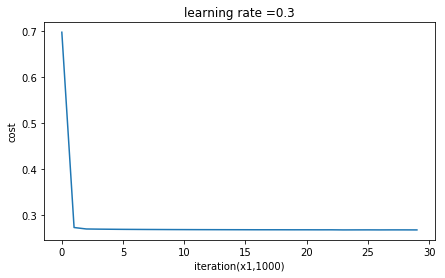

On the train set:
Accuracy: 0.938388625592
On the test set:
Accuracy: 0.93


In [32]:
parameters = model(train_X,train_Y,lambd=0.7)
print "On the train set:"
predictions_train = predict(train_X,train_Y,parameters)
print "On the test set:"
predictions_test = predict(test_X,test_Y,parameters)

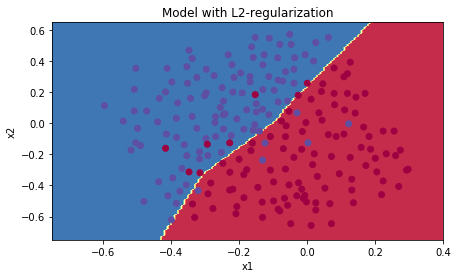

In [33]:
plt.title("Model with L2-regularization")
axes = plt.gca()
axes.set_xlim([-0.75,0.40])
axes.set_ylim([-0.75,0.65])
plot_decision_boundary(lambda x: predict_dec(parameters, x.T), train_X, train_Y)

In [46]:
def forward_propagation_with_dropout(X, parameters, keep_prob = 0.5):
    np.random.seed(1)
    
    # retrieve parameters
    W1 = parameters["W1"]
    b1 = parameters["b1"]
    W2 = parameters["W2"]
    b2 = parameters["b2"]
    W3 = parameters["W3"]
    b3 = parameters["b3"]
    
    Z1 = np.dot(W1,X)+b1
    A1 = relu(Z1)
    
    D1 = np.random.rand(A1.shape[0],A1.shape[1])
    D1 = (D1<keep_prob)
    A1 = A1*D1
    A1 = A1/keep_prob
    
    Z2 = np.dot(W2,A1)+b2
    A2 = relu(Z2)
    
    D2 = np.random.rand(A2.shape[0],A2.shape[1])
    D2 = (D2<keep_prob)
    A2 = A2*D2
    A2 = A2/keep_prob
    
    Z3 = np.dot(W3,A2)+b3
    A3 = sigmoid(Z3)
    
    cache = (Z1, D1, A1, W1, b1, Z2, D2, A2, W2, b2, Z3, A3, W3, b3)
    return A3,cache

In [47]:
X_assess, parameters = forward_propagation_with_dropout_test_case()
A3,cache = forward_propagation_with_dropout(X_assess,parameters,keep_prob=0.7)
print str(A3)

[[ 0.36974721  0.00305176  0.04565099  0.49683389  0.36974721]]


In [48]:
def backward_propagation_with_dropout(X,Y,cache,keep_prob):
    m = X.shape[1]
    (Z1, D1, A1, W1, b1, Z2, D2, A2, W2, b2, Z3, A3, W3, b3) = cache
    dZ3 = A3-Y
    dW3 = 1./m*np.dot(dZ3,A2.T)
    db3 = 1./m*np.sum(dZ3,axis=1,keepdims=True)
    dA2 = np.dot(W3.T,dZ3)
    
    dA2 = D2*dA2
    dA2 = dA2/keep_prob
    
    dZ2 = np.multiply(dA2,np.int64(A2>0))
    dW2 = 1./m*np.dot(dZ2,A1.T)
    db2 = 1./m*np.sum(dZ2,axis=1,keepdims=True)
    
    dA1 = np.dot(W2.T,dZ2)
    dA1 = D1*dA1
    dA1 = dA1/keep_prob
    
    dZ1 = np.multiply(dA1,np.int64(A1>0))
    dW1 = 1./m*np.dot(dZ1,X.T)
    db1 = 1./m*np.sum(dZ1,axis=1,keepdims =True)
    gradients = {"dZ3": dZ3, "dW3": dW3, "db3": db3,"dA2": dA2,
                 "dZ2": dZ2, "dW2": dW2, "db2": db2, "dA1": dA1, 
                 "dZ1": dZ1, "dW1": dW1, "db1": db1}
    
    return gradients

In [49]:
X_assess, Y_assess, cache = backward_propagation_with_dropout_test_case()

gradients = backward_propagation_with_dropout(X_assess, Y_assess, cache, keep_prob = 0.8)

print "dA1 = " + str(gradients["dA1"])
print "dA2 = " + str(gradients["dA2"])

dA1 = [[ 0.36544439  0.         -0.00188233  0.         -0.17408748]
 [ 0.65515713  0.         -0.00337459  0.         -0.        ]]
dA2 = [[ 0.58180856  0.         -0.00299679  0.         -0.27715731]
 [ 0.          0.53159854 -0.          0.53159854 -0.34089673]
 [ 0.          0.         -0.00292733  0.         -0.        ]]


Cost after iteration 0:0.654391240515


reg_utils.py:236: RuntimeWarning: divide by zero encountered in log
  logprobs = np.multiply(-np.log(a3),Y) + np.multiply(-np.log(1 - a3), 1 - Y)
reg_utils.py:236: RuntimeWarning: invalid value encountered in multiply
  logprobs = np.multiply(-np.log(a3),Y) + np.multiply(-np.log(1 - a3), 1 - Y)


Cost after iteration 10000:0.0610169865749
Cost after iteration 20000:0.0605824357985


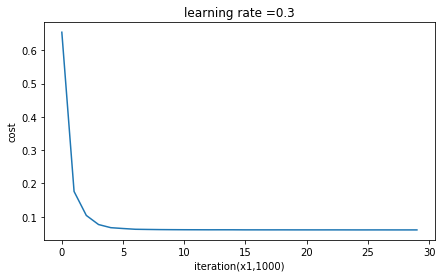

On the train set:
Accuracy: 0.928909952607
On the test set:
Accuracy: 0.95


In [50]:
parameters = model(train_X, train_Y, keep_prob = 0.86, learning_rate = 0.3)

print "On the train set:"
predictions_train = predict(train_X, train_Y, parameters)
print "On the test set:"
predictions_test = predict(test_X, test_Y, parameters)

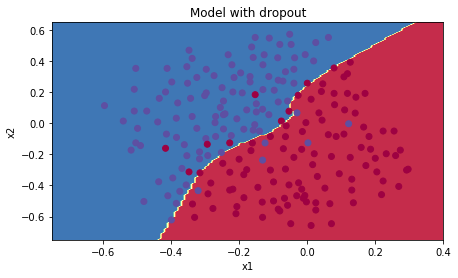

In [51]:
plt.title("Model with dropout")
axes = plt.gca()
axes.set_xlim([-0.75,0.40])
axes.set_ylim([-0.75,0.65])
plot_decision_boundary(lambda x: predict_dec(parameters, x.T), train_X, train_Y)

#Regularization will help you reduce overfitting
#Regularization will drive your weights to lower values
#L2 regularization and Dropout are two very effective regularization techniques